<a href="https://colab.research.google.com/github/UvanShankar/dogXception/blob/master/dogXceptionapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import matplotlib.pyplot as plt                        
%matplotlib inline                             
from keras.models import load_model
import numpy as np


In [3]:
! git clone https://github.com/UvanShankar/dogXception.git

Cloning into 'dogXception'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [10]:
!rm dogXception


rm: cannot remove 'dogXception': Is a directory


In [0]:
dog_names=['/dogImages/train/001.Affenpinscher',
 '/dogImages/train/002.Afghan_hound',
 '/dogImages/train/003.Airedale_terrier',
 '/dogImages/train/004.Akita',
 '/dogImages/train/005.Alaskan_malamute',
 '/dogImages/train/006.American_eskimo_dog',
 '/dogImages/train/007.American_foxhound',
 '/dogImages/train/008.American_staffordshire_terrier',
 '/dogImages/train/009.American_water_spaniel',
 '/dogImages/train/010.Anatolian_shepherd_dog',
 '/dogImages/train/011.Australian_cattle_dog',
 '/dogImages/train/012.Australian_shepherd',
 '/dogImages/train/013.Australian_terrier',
 '/dogImages/train/014.Basenji',
 '/dogImages/train/015.Basset_hound',
 '/dogImages/train/016.Beagle',
 '/dogImages/train/017.Bearded_collie',
 '/dogImages/train/018.Beauceron',
 '/dogImages/train/019.Bedlington_terrier',
 '/dogImages/train/020.Belgian_malinois',
 '/dogImages/train/021.Belgian_sheepdog',
 '/dogImages/train/022.Belgian_tervuren',
 '/dogImages/train/023.Bernese_mountain_dog',
 '/dogImages/train/024.Bichon_frise',
 '/dogImages/train/025.Black_and_tan_coonhound',
 '/dogImages/train/026.Black_russian_terrier',
 '/dogImages/train/027.Bloodhound',
 '/dogImages/train/028.Bluetick_coonhound',
 '/dogImages/train/029.Border_collie',
 '/dogImages/train/030.Border_terrier',
 '/dogImages/train/031.Borzoi',
 '/dogImages/train/032.Boston_terrier',
 '/dogImages/train/033.Bouvier_des_flandres',
 '/dogImages/train/034.Boxer',
 '/dogImages/train/035.Boykin_spaniel',
 '/dogImages/train/036.Briard',
 '/dogImages/train/037.Brittany',
 '/dogImages/train/038.Brussels_griffon',
 '/dogImages/train/039.Bull_terrier',
 '/dogImages/train/040.Bulldog',
 '/dogImages/train/041.Bullmastiff',
 '/dogImages/train/042.Cairn_terrier',
 '/dogImages/train/043.Canaan_dog',
 '/dogImages/train/044.Cane_corso',
 '/dogImages/train/045.Cardigan_welsh_corgi',
 '/dogImages/train/046.Cavalier_king_charles_spaniel',
 '/dogImages/train/047.Chesapeake_bay_retriever',
 '/dogImages/train/048.Chihuahua',
 '/dogImages/train/049.Chinese_crested',
 '/dogImages/train/050.Chinese_shar-pei',
 '/dogImages/train/051.Chow_chow',
 '/dogImages/train/052.Clumber_spaniel',
 '/dogImages/train/053.Cocker_spaniel',
 '/dogImages/train/054.Collie',
 '/dogImages/train/055.Curly-coated_retriever',
 '/dogImages/train/056.Dachshund',
 '/dogImages/train/057.Dalmatian',
 '/dogImages/train/058.Dandie_dinmont_terrier',
 '/dogImages/train/059.Doberman_pinscher',
 '/dogImages/train/060.Dogue_de_bordeaux',
 '/dogImages/train/061.English_cocker_spaniel',
 '/dogImages/train/062.English_setter',
 '/dogImages/train/063.English_springer_spaniel',
 '/dogImages/train/064.English_toy_spaniel',
 '/dogImages/train/065.Entlebucher_mountain_dog',
 '/dogImages/train/066.Field_spaniel',
 '/dogImages/train/067.Finnish_spitz',
 '/dogImages/train/068.Flat-coated_retriever',
 '/dogImages/train/069.French_bulldog',
 '/dogImages/train/070.German_pinscher',
 '/dogImages/train/071.German_shepherd_dog',
 '/dogImages/train/072.German_shorthaired_pointer',
 '/dogImages/train/073.German_wirehaired_pointer',
 '/dogImages/train/074.Giant_schnauzer',
 '/dogImages/train/075.Glen_of_imaal_terrier',
 '/dogImages/train/076.Golden_retriever',
 '/dogImages/train/077.Gordon_setter',
 '/dogImages/train/078.Great_dane',
 '/dogImages/train/079.Great_pyrenees',
 '/dogImages/train/080.Greater_swiss_mountain_dog',
 '/dogImages/train/081.Greyhound',
 '/dogImages/train/082.Havanese',
 '/dogImages/train/083.Ibizan_hound',
 '/dogImages/train/084.Icelandic_sheepdog',
 '/dogImages/train/085.Irish_red_and_white_setter',
 '/dogImages/train/086.Irish_setter',
 '/dogImages/train/087.Irish_terrier',
 '/dogImages/train/088.Irish_water_spaniel',
 '/dogImages/train/089.Irish_wolfhound',
 '/dogImages/train/090.Italian_greyhound',
 '/dogImages/train/091.Japanese_chin',
 '/dogImages/train/092.Keeshond',
 '/dogImages/train/093.Kerry_blue_terrier',
 '/dogImages/train/094.Komondor',
 '/dogImages/train/095.Kuvasz',
 '/dogImages/train/096.Labrador_retriever',
 '/dogImages/train/097.Lakeland_terrier',
 '/dogImages/train/098.Leonberger',
 '/dogImages/train/099.Lhasa_apso',
 '/dogImages/train/100.Lowchen',
 '/dogImages/train/101.Maltese',
 '/dogImages/train/102.Manchester_terrier',
 '/dogImages/train/103.Mastiff',
 '/dogImages/train/104.Miniature_schnauzer',
 '/dogImages/train/105.Neapolitan_mastiff',
 '/dogImages/train/106.Newfoundland',
 '/dogImages/train/107.Norfolk_terrier',
 '/dogImages/train/108.Norwegian_buhund',
 '/dogImages/train/109.Norwegian_elkhound',
 '/dogImages/train/110.Norwegian_lundehund',
 '/dogImages/train/111.Norwich_terrier',
 '/dogImages/train/112.Nova_scotia_duck_tolling_retriever',
 '/dogImages/train/113.Old_english_sheepdog',
 '/dogImages/train/114.Otterhound',
 '/dogImages/train/115.Papillon',
 '/dogImages/train/116.Parson_russell_terrier',
 '/dogImages/train/117.Pekingese',
 '/dogImages/train/118.Pembroke_welsh_corgi',
 '/dogImages/train/119.Petit_basset_griffon_vendeen',
 '/dogImages/train/120.Pharaoh_hound',
 '/dogImages/train/121.Plott',
 '/dogImages/train/122.Pointer',
 '/dogImages/train/123.Pomeranian',
 '/dogImages/train/124.Poodle',
 '/dogImages/train/125.Portuguese_water_dog',
 '/dogImages/train/126.Saint_bernard',
 '/dogImages/train/127.Silky_terrier',
 '/dogImages/train/128.Smooth_fox_terrier',
 '/dogImages/train/129.Tibetan_mastiff',
 '/dogImages/train/130.Welsh_springer_spaniel',
 '/dogImages/train/131.Wirehaired_pointing_griffon',
 '/dogImages/train/132.Xoloitzcuintli',
 '/dogImages/train/133.Yorkshire_terrier']

Number of faces detected: 0


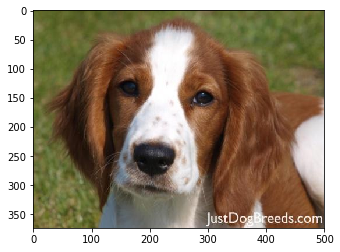

In [5]:
# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('/content/dogXception/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread("/content/dogXception/Welsh_springer_spaniel_08203.jpg")
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()




# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0
  
  
  

  
#The path_to_tensor function below takes a string-valued file path 
#to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN

from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

This image looks like a Welsh_springer_spaniel.


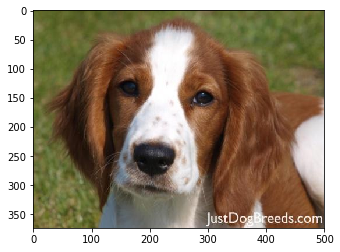

In [9]:
Xception_model = load_model('/content/dogXception/Xception_model_dog.h5')
def extract_Xception(tensor):
	from keras.applications.xception import Xception, preprocess_input
	return Xception(weights='imagenet', include_top=False).predict(preprocess_input(tensor))
### A function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
img_path = '/content/dogXception/Welsh_springer_spaniel_08203.jpg'
#img_path = dog_files_short[2]
def classify_dog_breed(img_path):
    img = path_to_tensor(img_path)
    predictions = Xception_model.predict(extract_Xception(img))
    prediction = np.argmax(predictions)
    dog_names[prediction].split('.')[-1]
    print('This image looks like a {}.'.format(dog_names[prediction].split('.')[-1]))
    return dog_names[prediction].split('.')[-1]
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
prediction = classify_dog_breed(img_path)